# EDAS and PREPROCESSING EXERCISE. ETHIC Analysis

## BACKGROUND:
* Correctional Offender Management Profiling for Alternative Sanctions (COMPAS) is a case management and decision support tool developed and owned by Northpointe (now Equivant) used by U.S. courts to assess the likelihood of a defendant becoming a recidivist. https://en.wikipedia.org/wiki/COMPAS_(software)


- ANALYZING:

    1. EDAS
    2. Discriminatory variables: Are the variables "is_recid" and "is_violent_recid" suitable for evaluation risk, under the COMPAS System
    3. Obtaining Confussion matrix for threshold = 0.7
    4. Comparing Caucasiz race Vs. Afroamerican race risk assignment
    5. Is the System better for Violents crimes or for general crimes


## Importing Libraries

In [1]:
import pandas as pd
import altair as alt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


## Get DATA

In [2]:
#cargo el archivo para leerlo en csv sin necesidad de modificar el formato, ni separadores al ser de USA
compas_raw=pd.read_csv("./Datos/compas-scores.csv")

In [3]:
compas_raw.shape

(11757, 47)

In [4]:
compas_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11757 entries, 0 to 11756
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       11757 non-null  int64  
 1   name                     11757 non-null  object 
 2   first                    11757 non-null  object 
 3   last                     11757 non-null  object 
 4   compas_screening_date    11757 non-null  object 
 5   sex                      11757 non-null  object 
 6   dob                      11757 non-null  object 
 7   age                      11757 non-null  int64  
 8   age_cat                  11757 non-null  object 
 9   race                     11757 non-null  object 
 10  juv_fel_count            11757 non-null  int64  
 11  decile_score             11757 non-null  int64  
 12  juv_misd_count           11757 non-null  int64  
 13  juv_other_count          11757 non-null  int64  
 14  priors_count          

* Selecting fields needed

In [5]:
compas=pd.DataFrame(compas_raw[["compas_screening_date","decile_score",
                                "v_decile_score","is_recid","r_offense_date",
                                "is_violent_recid","vr_offense_date"]])

### 1. EDAS

In [6]:
compas.head()

,compas_screening_date,decile_score,v_decile_score,is_recid,r_offense_date,is_violent_recid,vr_offense_date
0,2013-08-14,1,1,0,NaN,0,NaN
1,2014-12-31,5,2,-1,NaN,0,NaN
2,2013-01-27,3,1,1,2013-07-05,1,2013-07-05
3,2013-04-14,4,3,1,2013-06-16,0,NaN
4,2013-01-13,8,6,0,NaN,0,NaN


In [7]:
compas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11757 entries, 0 to 11756
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   compas_screening_date  11757 non-null  object
 1   decile_score           11757 non-null  int64 
 2   v_decile_score         11757 non-null  int64 
 3   is_recid               11757 non-null  int64 
 4   r_offense_date         3703 non-null   object
 5   is_violent_recid       11757 non-null  int64 
 6   vr_offense_date        882 non-null    object
dtypes: int64(4), object(3)
memory usage: 643.1+ KB


In [8]:
compas.describe()

,decile_score,v_decile_score,is_recid,is_violent_recid
count,11757.000000,11757.000000,11757.000000,11757.000000
mean,4.371268,3.571489,0.253806,0.075019
std,2.877598,2.500479,0.558324,0.263433
min,-1.000000,-1.000000,-1.000000,0.000000
25%,2.000000,1.000000,0.000000,0.000000
50%,4.000000,3.000000,0.000000,0.000000
75%,7.000000,5.000000,1.000000,0.000000
max,10.000000,10.000000,1.000000,1.000000


In [9]:
compas.describe(include="object")

,compas_screening_date,r_offense_date,vr_offense_date
count,11757,3703,882
unique,704,1090,599
top,2013-03-20,2014-12-08,2015-08-15
freq,39,12,6


- Object Data:
    * there are some Date data that shoudl be  transform into datetime type
    * There are some null values in r_offense_Sate and in vr_offense_date. Exploration needed.

- Numeric Data:
    * It seems most shoudl be categorical.
    * Integrity and validity data analysis needed


- Converting  object types to datatype

In [10]:

col_date=["compas_screening_date","r_offense_date","vr_offense_date"]

for field in col_date:
    compas[field]=pd.to_datetime(compas[field])
    print (compas[field].dtype)

datetime64[ns]
datetime64[ns]
datetime64[ns]


- **Validity:**
    - Are values  "decile_score" between 1-10?
    - idem for v_Decile_score
    - Are values from "decile_score" between 0-1?
    - idem for para is_violent_recid

In [11]:
col_int=["decile_score","v_decile_score","is_recid","is_violent_recid"]
for field in col_int:
    print("datos distintos de:", field, compas[field].unique())
    

datos distintos de: decile_score [ 1  5  3  4  8  6 10  9  2 -1  7]
datos distintos de: v_decile_score [ 1  2  3  6  9  5  4  7 10  8 -1]
datos distintos de: is_recid [ 0 -1  1]
datos distintos de: is_violent_recid [0 1]


* there are non valid values in  decile_score, v_decile_score and in  is_recid. Converting to NaN, based on the descriptive data (see wikipedia link)

In [12]:
compas=compas.replace(to_replace=(-1), value=np.nan)

In [13]:
#verifying the replacement
for field in col_int:
    print("datos distintos de:", field, compas[field].unique())

datos distintos de: decile_score [ 1.  5.  3.  4.  8.  6. 10.  9.  2. nan  7.]
datos distintos de: v_decile_score [ 1.  2.  3.  6.  9.  5.  4.  7. 10.  8. nan]
datos distintos de: is_recid [ 0. nan  1.]
datos distintos de: is_violent_recid [0 1]


- **Integrity:**
    - exploring if data are completed without counting NaN

In [14]:

for field in col_int:
    print("missing values in ",field,":",compas["compas_screening_date"].count()-compas[field].notna().sum())

for field in col_date:
    print("missing values in ",field,":",compas["compas_screening_date"].count()-compas[field].notna().sum())



missing values in  decile_score : 15
missing values in  v_decile_score : 5
missing values in  is_recid : 719
missing values in  is_violent_recid : 0
missing values in  compas_screening_date : 0
missing values in  r_offense_date : 8054
missing values in  vr_offense_date : 10875


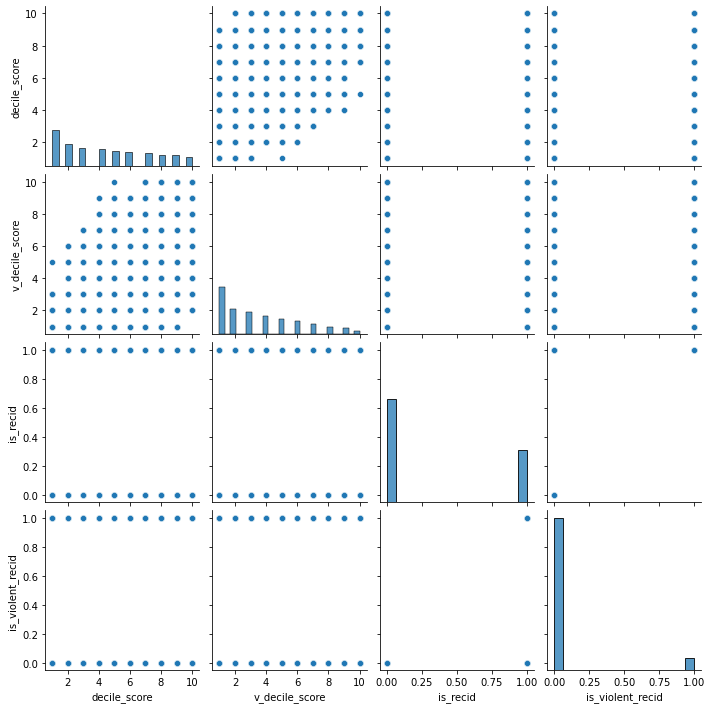

In [15]:
# quick-search to identify some pattern for asigning to NaN values...

sns.pairplot(compas)

In [16]:
# quick look to the crosstab relationship between "is_recid" and "decile_Score" to be able to assign Nan values to decile_Score
pd.crosstab(compas["is_recid"],compas["decile_score"])


decile_score,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
is_recid,,,,,,,,,,
0.0,2013,1131,829,748,612,535,465,369,368,256
1.0,355,347,338,382,370,406,397,389,393,324


In [17]:
# and for Nan values?
pd.crosstab(compas["is_recid"].isna(),compas["decile_score"])

decile_score,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
is_recid,,,,,,,,,,
False,2368,1478,1167,1130,982,941,862,758,761,580
True,209,94,92,69,52,52,38,38,41,30


* As it is not clear, I decide not to assign values to the NaN. Further analysis shoudl be done with some regression or similar

In [18]:
# Analizing missign date values
compas.loc[compas["r_offense_date"].isna(),"compas_screening_date"].nunique()

702

* There are 702 unique compas_Screening_Dates dates for the 8.054 NaN-"offense_dates". How are they distributed?:


<AxesSubplot:xlabel='compas_screening_date', ylabel='Count'>

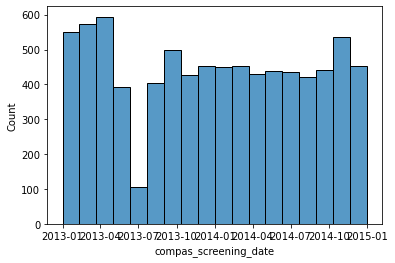

In [19]:
sns.histplot(compas.loc[compas["r_offense_date"].isna(),"compas_screening_date"])

<AxesSubplot:xlabel='compas_screening_date', ylabel='r_offense_date'>

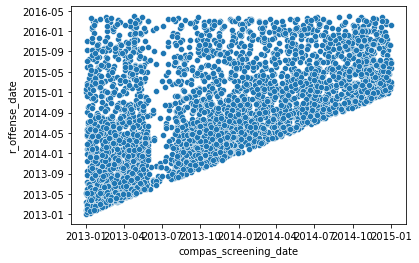

In [20]:
sns.scatterplot(compas["compas_screening_date"], compas["r_offense_date"])

* offense_date data is > screening_Date, whichi is logic due to the metadata
* There is a discontinuity in July2013 (perhaps sumer holidays?)
* There is not a lcear patron for r_offense_Date data


In [21]:
# idem for vr_offense_date

alt.Chart(compas.iloc[:4000,:]).mark_circle().encode(
    x="compas_screening_date:T", y=alt.Y("vr_offense_date:T"), 
    color=alt.Color("decile_score"))

alt.Chart(...)

In [22]:
# Ordering  r_offense_date to identify if there is a date where there is a patron
compas.sort_values(by="r_offense_date")

,compas_screening_date,decile_score,v_decile_score,is_recid,r_offense_date,is_violent_recid,vr_offense_date
9338,2013-01-01,2.0,2.0,1.0,2013-01-03,0,NaT
8384,2013-01-09,7.0,2.0,1.0,2013-01-11,0,NaT
406,2013-01-11,10.0,7.0,1.0,2013-01-15,0,NaT
9625,2013-01-04,8.0,5.0,1.0,2013-01-16,0,NaT
637,2013-01-10,6.0,6.0,1.0,2013-01-16,0,NaT
...,...,...,...,...,...,...,...
11750,2014-03-04,1.0,1.0,0.0,NaT,0,NaT
11752,2013-09-22,3.0,1.0,0.0,NaT,0,NaT
11754,2014-10-08,4.0,3.0,0.0,NaT,0,NaT
11755,2013-12-03,3.0,2.0,0.0,NaT,0,NaT


In [23]:
# exploring how many different "r_offense_data" values are in the last 8055 (8054 NaN values +1) ordered rows

compas.iloc[:,[0,4]].sort_values(by="r_offense_date").tail(8055)["r_offense_date"].unique()

array(['2016-03-29T00:00:00.000000000',                           'NaT'],
      dtype='datetime64[ns]')

* So from 2016.03.29 all the "r_offense_data" values are NaN

In [24]:
compas.iloc[:,[0,4]].sort_values(by="r_offense_date").tail(8055)

,compas_screening_date,r_offense_date
2127,2014-09-22,2016-03-29
0,2013-08-14,NaT
1,2014-12-31,NaT
4,2013-01-13,NaT
5,2013-03-26,NaT
...,...,...
11750,2014-03-04,NaT
11752,2013-09-22,NaT
11754,2014-10-08,NaT
11755,2013-12-03,NaT


In [25]:
# idem insight  for  vr_offnse_date. 
compas.iloc[:,[0,6]].sort_values(by="vr_offense_date").tail(10876)

,compas_screening_date,vr_offense_date
4418,2014-01-27,2016-03-13
0,2013-08-14,NaT
1,2014-12-31,NaT
3,2013-04-14,NaT
4,2013-01-13,NaT
...,...,...
11752,2013-09-22,NaT
11753,2013-05-17,NaT
11754,2014-10-08,NaT
11755,2013-12-03,NaT


### 2. Discriminatory variables: Are the variables "is_recid" and "is_violent_recid" suitable for evaluation risk, under the COMPAS System?

In [26]:
#  is_recid values if  r_offense_date =NAN
compas.iloc[:,[0,3,4]].sort_values(by="r_offense_date").tail(8054).describe()

,is_recid
count,7335.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


* is_recid Values are = 0 if r_offense_date=NaN

*  is_recid has  11038 values, that could be  T/F
* However, there are 8.054 value where there is no date  r_offense_date, where is_recid is null, so it means there was no reincidence. 

* Therefore, there is a supossition of NO reincidence, but truly it is unknown.

* A new feature will be created "is_recid_mod" with the same values as " is_recid" except when "r_offense_Date" is NaT, when is_recid_mod=NaN)

In [27]:
compas["is_recid_mod"]=compas["is_recid"]
compas.loc[compas["r_offense_date"].isna(),"is_recid_mod"]=np.nan

In [28]:
# idem for is_violent_recid creating a new feature is_violent_recid_mod
compas["is_violent_recid_mod"]=compas["is_violent_recid"]
compas.loc[compas["vr_offense_date"].isna(),"is_violent_recid_mod"]=np.nan

In [29]:
compas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11757 entries, 0 to 11756
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   compas_screening_date  11757 non-null  datetime64[ns]
 1   decile_score           11742 non-null  float64       
 2   v_decile_score         11752 non-null  float64       
 3   is_recid               11038 non-null  float64       
 4   r_offense_date         3703 non-null   datetime64[ns]
 5   is_violent_recid       11757 non-null  int64         
 6   vr_offense_date        882 non-null    datetime64[ns]
 7   is_recid_mod           3703 non-null   float64       
 8   is_violent_recid_mod   882 non-null    float64       
dtypes: datetime64[ns](3), float64(5), int64(1)
memory usage: 826.8 KB


### 3. Obtaining Confussion matrix for decile_Score- threshold = 0.7 


In [30]:
# new field "predict_recid"  with values "0" if decile_Score <7,  and "1" if deciles_Score >=7

compas["predict_recid"]=""
for i in np.arange(0,len(compas),1):
    if compas.iloc[i,1]<7:
        compas.iloc[i,9]=0
        
    else:
        compas.iloc[i,9]=1
        

<AxesSubplot:>

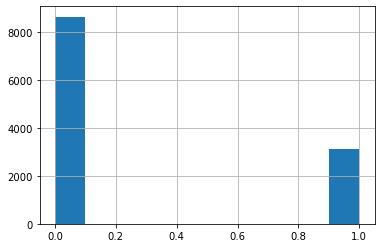

In [31]:
compas["predict_recid"].hist()

In [32]:
tabla_contingencia=pd.crosstab(compas["predict_recid"],compas["is_recid"])


### 4. Comparing Caucasian race Vs. Afroamerican race risk assignmenttabla_contingencia


In [33]:
# Selecting DF for chart-analysis

compas_graf=pd.DataFrame(compas_raw[["sex","race","decile_score",
                                       "v_decile_score", "is_recid","is_violent_recid"]])
compas_graf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11757 entries, 0 to 11756
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sex               11757 non-null  object
 1   race              11757 non-null  object
 2   decile_score      11757 non-null  int64 
 3   v_decile_score    11757 non-null  int64 
 4   is_recid          11757 non-null  int64 
 5   is_violent_recid  11757 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 551.2+ KB


In [34]:
# replacing NaN Value with "-1"
for field in ["decile_score","is_recid"]:
              compas_graf[field]=compas_graf[field].replace(to_replace=(-1), value=np.nan)

In [35]:
data=compas_graf.sample(n=5000) # sample for visualazing with Altair

# Sex Vs Race with average(decile_score)

alt.Chart(data).mark_point().encode(x=alt.X("race:O"),
                                    y=alt.Y("mean(decile_score):Q"),
                                    color=alt.Color("sex"),
                                    tooltip=['mean(decile_score)','sex']
                                   )




alt.Chart(...)

* Afroamerican(AA) persons have a higher associated risk than Caucasian (C)
* For AA persons, men have a higher associated risk that women
* For C persons, women have a small higher values than men
* as it is a sample, this values could change a little


In [36]:
# Analyzing  sex, raceand reincidence (is_recit)
alt.Chart(data, title=" % recit /race/sex").mark_bar().encode(
    y=alt.Y("count(race):N", stack="normalize", title='total cases'),
    x=alt.X("race:O"),
    color=alt.Color("is_recid:N"),
    tooltip=['count(race)','race','is_recid'],
    row='sex:N'
).properties(
    width=550,
    height=340)


alt.Chart(...)


* There is almost no difference between women (AA Vs C).
* AA men have higher values than C men


In [37]:
# Analizing sex Vs mean(decile_score)
alt.Chart(data, title="Associated risk for re-incidenced/sex"
         ).mark_bar(
).encode(x=alt.X("sex:O"),
         y=alt.Y("mean(decile_score):Q", title='Associated risk'),
         color=alt.Color("sex"),
         tooltip=['mean(decile_score)']
)



alt.Chart(...)

* For determining if it is Fair or not, I calcule the reincidt_rate average probability of reincidece for the persons that are truly reincidence. In this sense, for higher probability, it means that for re-incidence person, he has a higher risk, which is not fair.

* This is a simple calcule, and there are other more suitable calcules for determining its fairness 


In [38]:
lista=[]

for field in compas_graf['race'].unique():
    a=compas_graf.loc[compas_graf['race']==field,'decile_score'].mean()
    b=compas_graf.loc[compas_graf['race']==field,'is_recid'].count() 
    c=compas_graf[compas_graf['race']==field]['decile_score'].count()
    lista.insert(1,[field,round(a,2),round(b,2),round(c,2),round(100*b/c,2),round(100*b/c/a,2)])

print(lista)


[['Other', 2.78, 621, 660, 94.09, 33.82], ['Native American', 4.75, 36, 40, 90.0, 18.95], ['Asian', 2.74, 53, 58, 91.38, 33.33], ['Hispanic', 3.28, 1009, 1100, 91.73, 27.97], ['African-American', 5.31, 5501, 5807, 94.73, 17.85], ['Caucasian', 3.63, 3818, 4077, 93.65, 25.81]]


In [39]:
df_grouped=pd.DataFrame(lista)
df_grouped.columns=('race','average_decile','tot_persons_recid',' tot_person_decile','re-incid_rate','re-incid_rate/decile')
df_grouped.head(80)

,race,average_decile,tot_persons_recid,tot_person_decile,re-incid_rate,re-incid_rate/decile
0,Other,2.78,621,660,94.09,33.82
1,Native American,4.75,36,40,90.00,18.95
2,Asian,2.74,53,58,91.38,33.33
3,Hispanic,3.28,1009,1100,91.73,27.97
4,African-American,5.31,5501,5807,94.73,17.85
5,Caucasian,3.63,3818,4077,93.65,25.81


In [40]:
# normalizing data for comparation 

In [41]:
data=df_grouped.iloc[:,[2,4]]
dataf=((data-data.min())/(data.max()-data.min()))
dataf

,tot_persons_recid,re-incid_rate
0,0.107045,0.864693
1,0.000000,0.000000
2,0.003111,0.291755
3,0.178042,0.365751
4,1.000000,1.000000
5,0.692040,0.771670
